# Wordcloud

In [1]:
from google.colab import files
uploaded = files.upload()

import io
import pandas as pd

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  # Assuming the uploaded file is a CSV
  try:
    df_okejek = pd.read_csv(io.BytesIO(uploaded[fn]))
    print("Successfully loaded CSV into df_okejek")
  except pd.errors.ParserError:
      print(f"Error: Could not parse {fn} as a CSV. Please upload a valid CSV file.")
      df_okejek = pd.DataFrame() # Create an empty DataFrame if parsing fails
  except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df_okejek = pd.DataFrame()

Saving okejek_with_tokens.csv to okejek_with_tokens.csv
User uploaded file "okejek_with_tokens.csv" with length 1531209 bytes
Successfully loaded CSV into df_okejek


In [9]:
df_okejek.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4542 entries, 0 to 4541
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              4542 non-null   object        
 1   userName              4542 non-null   object        
 2   userImage             4542 non-null   object        
 3   content               4297 non-null   object        
 4   score                 4542 non-null   int64         
 5   thumbsUpCount         4542 non-null   int64         
 6   reviewCreatedVersion  3211 non-null   object        
 7   at                    4542 non-null   datetime64[ns]
 8   replyContent          338 non-null    object        
 9   repliedAt             338 non-null    object        
 10  appVersion            3211 non-null   object        
 11  sentiment_polarity    4542 non-null   float64       
 12  sentiment_subjective  4542 non-null   float64       
 13  wordCount         

/tmp/ipython-input-2774849499.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score_counts.index, y=score_counts.values, palette='viridis')


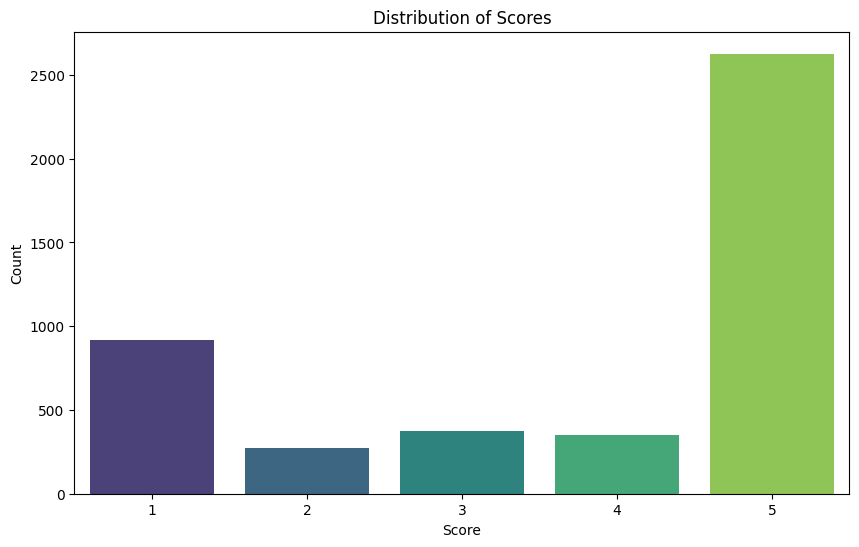

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analisis deskriptif untuk kolom 'score'
score_counts = df_okejek['score'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=score_counts.index, y=score_counts.values, palette='viridis')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

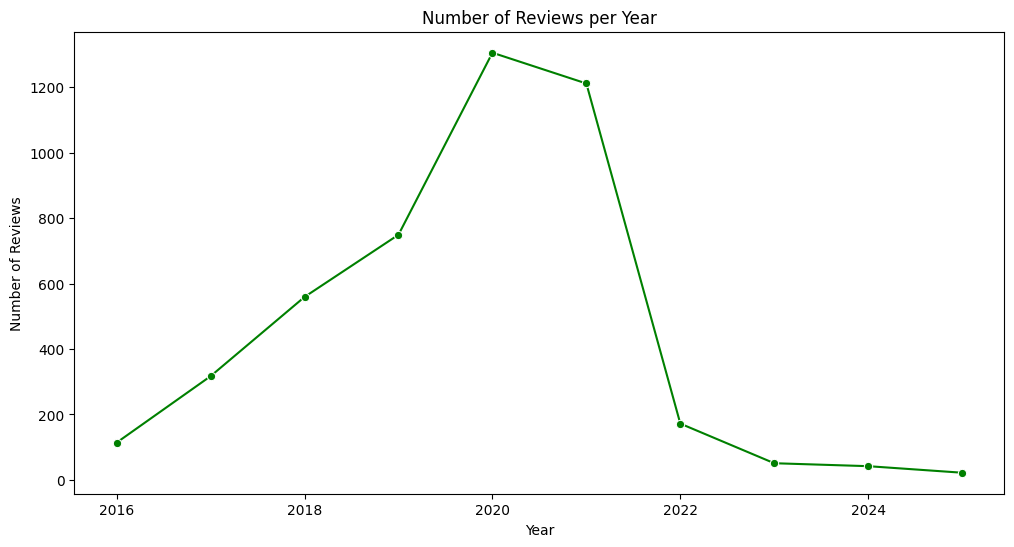

In [5]:
# Analisis deskriptif untuk kolom 'created_at'
df_okejek['at'] = pd.to_datetime(df_okejek['at'])
df_okejek['year'] = df_okejek['at'].dt.year
year_counts = df_okejek['year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='green')
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

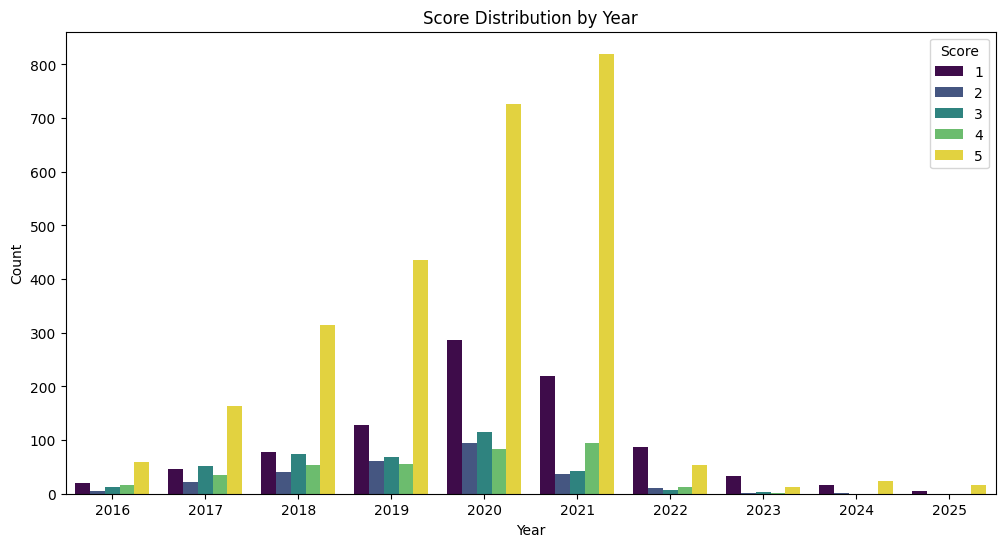

In [6]:
# Cross tabulasi antara 'year' dan 'score'
plt.figure(figsize=(12, 6))
sns.countplot(x='year', hue='score', data=df_okejek, palette='viridis')
plt.title('Score Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Score')
plt.show()

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Get the list of stopwords in Indonesian
stop_words = set(stopwords.words('indonesian'))

# Function to remove stopwords from a given text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Filter positive and negative reviews
positive_reviews = df_okejek[df_okejek['score'] >= 4]['content'].dropna()
negative_reviews = df_okejek[df_okejek['score'] <= 3]['content'].dropna()

# Combine all positive and negative reviews into single strings
positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

# Remove stopwords from the combined texts
positive_text = remove_stopwords(positive_text)
negative_text = remove_stopwords(negative_text)

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


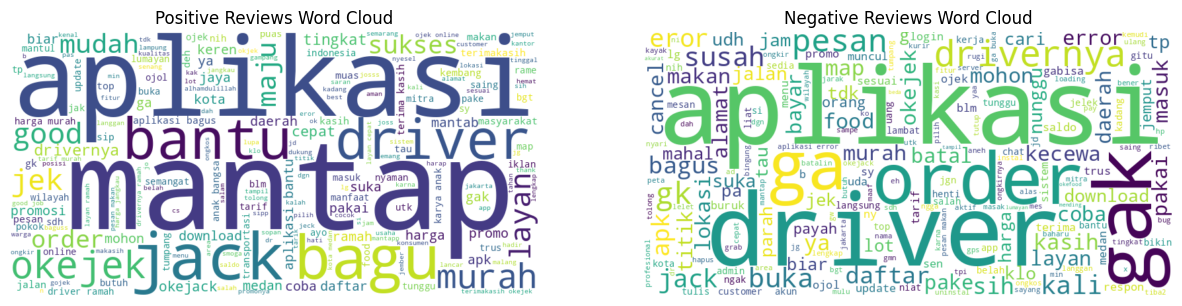

In [8]:
# Plot the word clouds
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.show()